# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [6]:
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values # We dont want the first "detail" column
y=dataset.iloc[:,-1].values

In [7]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y=y.reshape(len(y),1) 

The feature scaler class expects a certain type of input. A 2D array (Matrix), like seen in X above. Previously, we only used scaling on X, which is already a matrix. But for SVR, we need to scale y also, especially since here y takes extremely large values. reshape(no_of_rows,no_of_columns)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
X=scX.fit_transform(X)
scy=StandardScaler()
y=scy.fit_transform(y)
# Both X and y need their own, separate Standard Scalers.

In [13]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [17]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [22]:
scy.inverse_transform(regressor.predict(scX.transform([[6.5]])))

array([252789.13921624])

Whichever data the scaling was applied on, on those data we need to scale/inverse-scale while predicted new.
Usually we only transform X. So while predicting, we give the TRANSFORMED input X
Here, we have scaled y also, so for the correct answer we need to reverse-scale the output.

## Visualising the SVR results

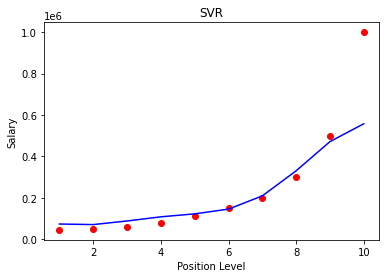

In [29]:
plt.scatter(scX.inverse_transform(X),scy.inverse_transform(y),color='red')
plt.plot(scX.inverse_transform(X),scy.inverse_transform(regressor.predict(X)),color='blue')
plt.title("SVR")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)